In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model


In [0]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-26-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-26-2020.csv')

In [0]:
cols = confirmed_df.keys()

confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [0]:

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

dates_label = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30],[31],[32],[33],[34],[35],[36],[37],[38],[39],[40],[41],[42],[43],[44],[45],[46],[47],[48],[49],[50],[51],[52],[53],[54],[55],[56],[57],[58],[59],[60]]
dates_label_jkt = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30],[31],[32],[33],[34],[35],[36],[37],[38],[39],[40],[41],[42],[43],[44],[45],[46],[47],[48],[49],[50],[51],[52],[53],[54],[55],[56],[57],[58],[59],[60]]
south_korea_cases = [[977],[1261],[1766],[2337],[3150],[3736],[4335],[5186],[5621],[6088],[6593],[7041],[7314],[7478],[7513],[7755],[7869],[7979],[8086],[8162],[8236],[8320],[8413],[8565],[8652],[8799],[8961],[8961],[9037],[9137],[9241],[9332],[9478],[9583],[9661],[9786],[9887],[9976],[10062],[10156],[10237],[10284],[10331],[10384],[10423],[10450],[10480],[10512],[10537],[10564],[10591],[10613],[10635],[10653],[10661],[10674],[10683],[10694],[10708],[10718]]
south_korea_deaths = [['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['1'],['2'],['2'],['6'],['8'],['10'],['12'],['13'],['13'],['16'],['17'],['28'],['28'],['35'],['35'],['42'],['44'],['50'],['53'],['54'],['60'],['66'],['66'],['72'],['75'],['75'],['81'],['84'],['91'],['94'],['102'],['111'],['111'],['120'],['126'],['131'],['139'],['144'],['152'],['158'],['162'],['165'],['169'],['174'],['177'],['183'],['186'],['192'],['200'],['204'],['208'],['211'],['214'],['217'],['222'],['225'],['229'],['230'],['232'],['234'],['236'],['237'],['238'],['240'],['240'],['242'],['243'],['244'],['246'],['247'],['248']]
south_korea_recoveries = [['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['1'],['1'],['3'],['3'],['3'],['7'],['7'],['7'],['9'],['9'],['10'],['12'],['12'],['16'],['16'],['16'],['18'],['18'],['22'],['22'],['22'],['22'],['27'],['30'],['30'],['30'],['41'],['41'],['135'],['135'],['118'],['118'],['247'],['288'],['333'],['510'],['510'],['510'],['1137'],['1407'],['1540'],['1540'],['1540'],['1540'],['2909'],['2909'],['3507'],['3730'],['4144'],['4528'],['4811'],['5033'],['5228'],['5408'],['5567'],['5828'],['6021'],['6325'],['6463'],['6598'],['6694'],['6776'],['6973'],['7117'],['7243'],['7368'],['7447'],['7534'],['7616'],['7757'],['7829'],['7937'],['8042'],['8114'],['8213'],['8277'],['8501'],['8635'],['8717'],['8764'],['8854'],['8922'],['9059'],['9072']]

jakarta_cases = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[2],[2],[2],[2],[4],[4],[6],[19],[27],[34],[34],[69],[96],[117],[134],[172],[227],[311],[369],[450],[514],[579],[686],[790],[893],[1046],[1155],[1285],[1414],[1528],[1677],[1790],[1986],[2092],[2273],[2491],[2738],[2956],[3293],[3512],[3842],[4241],[4557],[4839],[5136],[5516],[5923],[6248],[6575],[6760]]
jakarta_deaths = [['0'],['0'],['1'],['1'],['3'],['3'],['3'],['3'],['3'],['3'],['3'],['5'],['7'],['9'],['11'],['12'],['12'],['15'],['19'],['20'],['25'],['29']]
jakarta_recoveries = [['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['0'],['13'],['13'],['13'],['17'],['21']]


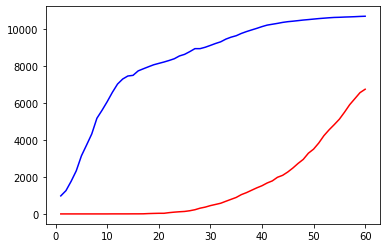

In [5]:
plt.plot(dates_label, south_korea_cases, color='blue')
plt.plot(dates_label, jakarta_cases, color='red')
plt.show()

In [0]:
scaler = MinMaxScaler()

normalization_SK = scaler.fit_transform(south_korea_cases)
normalization_ID = scaler.fit_transform(jakarta_cases)

In [7]:
regression = linear_model.LinearRegression()
regression.fit(dates_label, normalization_SK)

print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[0.01349315]]
Intercept:  [0.35275755]


In [8]:
normalization_SK = np.array(normalization_SK)
dates_label = np.array(dates_label)
model = keras.Sequential()
model.add(keras.layers.Dense(7,input_shape=(1,)))
model.add(keras.layers.Dense(12, activation='sigmoid'))
model.add(keras.layers.Dense(1))
adam = tf.keras.optimizers.Adam(lr = 0.03)
model.compile(loss='mse', optimizer='adam')
model.fit(dates_label, normalization_SK, epochs = 1000)

Epoch 1/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.2770
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.1091
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9337
Epoch 4/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.7516
Epoch 5/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.5711
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.3800
Epoch 7/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.2048
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.0304
Epoch 9/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.8703
Epoch 10/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.7197
Epoch 11/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.5778
Epoch 12/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.4386
Epoch 13/1000
2/2 [==============================

In [9]:
normalization_ID = np.array(normalization_ID)
dates_label_jkt = np.array(dates_label_jkt)
model.evaluate(dates_label_jkt, normalization_ID)

2/2 [==============================] - 0s 3ms/step - loss: 0.3566


0.3565601408481598

In [0]:
predictions = model.predict(normalization_ID)

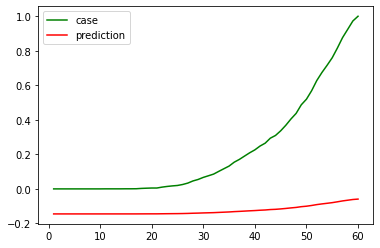

In [13]:
plt.plot(dates_label_jkt, normalization_ID, label="case", color='green')
plt.plot(dates_label_jkt, predictions, label='prediction', color='red')
plt.legend(loc='best')
plt.show()

dari apa yang saya lihat, bahwa data yang saya miliki tidak cocok dengan meodel yang saya buat karena dapat dilihat hasil prediksi yang dihasilkan tidak sesuai bahkan minus.